# 1. 사이킷런(scikit-learn) 시작
- 참고: https://for-my-wealthy-life.tistory.com/

## API 사용 방법

- 지도학습: 대체로 predict() 메서드를 사용해 알려지지 않은 데이터에 대한 레이블 예측
- 비지도 학습: 대체로 transform()이나 predict() 메서드를 사용해 데이터의 속성을 변환하거나 추론

## API 사용 예제

In [1]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_1504/1664231865.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-whitegrid"])


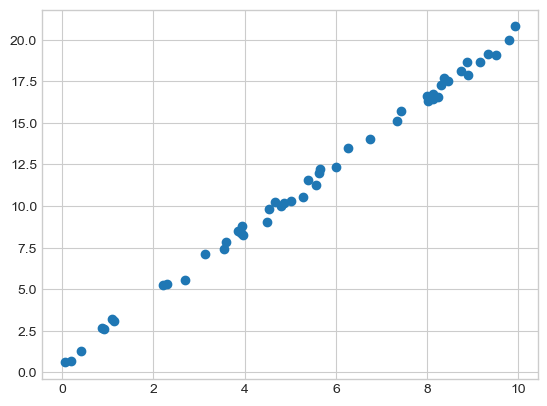

In [2]:
# 데이터 만들기
x = 10 * np.random.rand(50)
y = 2 * x + np.random.rand(50)
plt.scatter(x, y);

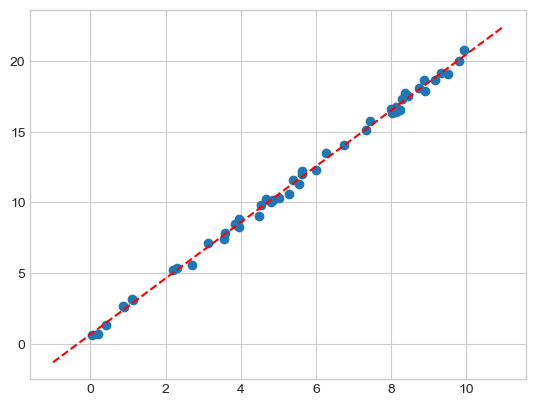

In [38]:
# 1. 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
from sklearn.linear_model import LinearRegression

# 2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
model = LinearRegression(fit_intercept=True)
model

# 3. 데이터를 특징 배열과 대상 벡터로 배치
X = x[:, np.newaxis]

# 4. 모델 인스턴스의 fit() 메서드를 호출해 모델을 데이터에 적합
model.fit(X, y)

# 5. 모델을 새 데이터에 대해서 적용
xfit = np.linspace(start=-1, stop=11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

# 시각화
plt.scatter(x, y)
plt.plot(xfit, yfit, "--r")
plt.show()

## 예측 데이터 셋

### 분류 또는 회귀용 데이터 셋

![](images/2023-03-17-10-59-54.png)
![](images/2023-03-17-11-02-45.png)

### 분류와 클러스터링을 위한 표본 데이터 생성

![](images/2023-03-17-11-13-18.png)

### 온라인 데이터 셋
- 데이터 크기가 커서 온라인에서 데이터를 다운로드 한 후에 불러오는 예제 데이터 셋


![](images/2023-03-17-11-04-10.png)

## 예제 데이터 셋 구조

- 일반적으로 딕셔너리 형태로 구성
- data: 특징(피처) 데이터 셋(X)
- target: 분류용을 레이블 값, 회귀용은 숫자 결과값 데이터(y)
- target_names: 개별 레이블의 이름(분류용)
- feature_names: 특징(피처) 이름
- DESCR: 데이터 셋에 대한 설명과 각 특징 설명

In [43]:
from sklearn.datasets import load_diabetes

# 당뇨병 데이터 불러오기
diabetes = load_diabetes()
print(diabetes.keys())
print("data:", diabetes["data"])
print("target:", diabetes["target"])
print("DESCR:", diabetes["DESCR"])
print("feature names:", diabetes["feature_names"])
print("data filename:", diabetes["data_filename"])
print("target filename:", diabetes["target_filename"])

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
data: [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
target: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  8

## model_selection 모듈
- 학습용 데이터와 테스트 데이터로 분리
- 교차 검증 분할 및 평가
- Estimator의 하이퍼 파라미터 튜닝을 위한 다양한 함수와 클래스 제공

### train_test_split(): 학습/테스트 데이터 셋 분리

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

# diabetes 데이터 불러오기
diabetes = load_diabetes()

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(diabetes["data"], diabetes["target"], test_size=0.3)

# LinearRegression 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.5165284119742868
평가 데이터 점수: 0.4984011388904961


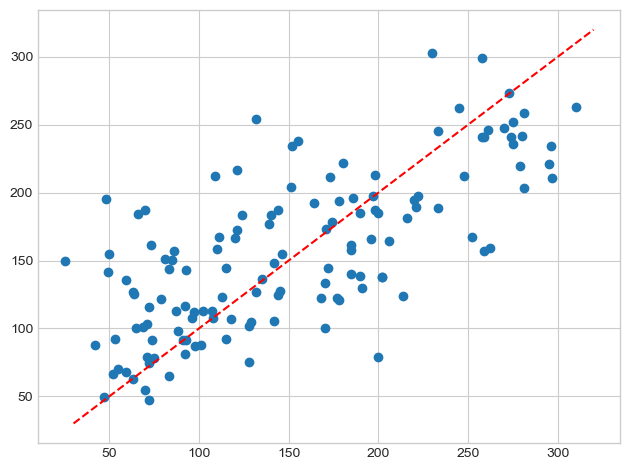

In [58]:
# 예측값
predict = model.predict(X_test)

# 시각화
plt.scatter(y_test, predict)
plt.plot([30, 320], [30, 320], "--r")
plt.tight_layout()
plt.show()

### cross_val_score(): 교차 검증

In [61]:
from sklearn.model_selection import cross_val_score, cross_validate

# 교차 검증 점수
scores = cross_val_score(model, diabetes["data"], diabetes["target"], cv=5)
print("교차 검증 정확도: {}".format(scores))
print("교차 검증 정확도: {} +/- {}".format(np.mean(scores), np.std(scores)))

교차 검증 정확도: [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
교차 검증 정확도: 0.48231643590864215 +/- 0.04926857751190375


## GridSearchCV: 교차 검증과 최적 하이퍼 파라미터 찾기
- 훈련 단계에서 학습한 파라미터에 영향을 받아서 최상의 파라미터를 찾는 일은 항상 어려운 문제
- 다양한 모델의 훈련 과정을 자동화하고, 교차 검사를 사용해 최적 값을 제공하는 도구 필요

In [68]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge

# 파라미터 후보군 설정
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

# GridSearchCV 실행
gs = GridSearchCV(Ridge(), param_grid=param_grid, cv=10)
result = gs.fit(diabetes["data"], diabetes["target"])

# 모델 평가
print("최적 점수: {}".format(result.best_score_))
print("최적 파라미터: {}".format(result.best_params_))
print(result.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수: 0.46332219117960366
최적 파라미터: {'alpha': 0.1}
Ridge(alpha=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000534,0.000246,0.000222,0.000047,0.001,{'alpha': 0.001},0.554416,0.233683,0.356798,0.620262,0.267029,0.619402,0.419900,0.433004,0.433424,0.684991,0.462291,0.145852,3
1,0.000370,0.000011,0.000181,0.000005,0.01,{'alpha': 0.01},0.546298,0.244129,0.368900,0.613735,0.271714,0.623092,0.426068,0.424745,0.429477,0.680918,0.462908,0.141449,2
2,0.000353,0.000009,0.000172,0.000004,0.1,{'alpha': 0.1},0.526551,0.244984,0.383530,0.606595,0.286090,0.618034,0.431226,0.441777,0.431962,0.662471,0.463322,0.132683,1
3,0.000333,0.000004,0.000164,0.000003,1,{'alpha': 1},0.421594,0.168441,0.358004,0.512609,0.284926,0.514263,0.388244,0.484445,0.396497,0.525135,0.405416,0.108386,4
4,0.000362,0.000045,0.000173,0.000016,10,{'alpha': 10},0.159387,-0.081177,0.152189,0.165690,0.119348,0.186933,0.158146,0.203748,0.153626,0.189441,0.140733,0.077298,5
5,0.000329,0.000006,0.000162,0.000002,100,{'alpha': 100},0.012468,-0.234480,0.013522,-0.012820,0.004838,0.022647,0.022028,-0.009908,0.015589,0.026427,-0.013969,0.074561,6
6,0.000352,0.000071,0.000169,0.000018,1000,{'alpha': 1000},-0.009602,-0.258118,-0.007849,-0.038479,-0.012933,-0.000932,0.001768,-0.042679,-0.004652,0.002744,-0.037073,0.075191,7


- multiprocessing을 이용한 GridSearchCV

In [70]:
import multiprocessing
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# iris 데이터 불러오기
iris = load_iris()

# 파라미터 후보군
param_grid={"penalty": ["l1", "l2"],
            "C": [1.5, 2.0, 2.5, 3.0, 3.5]}

# multiprocessing을 통해 cpu 개수를 지정해주고 GridSearchCV 실행
gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring="accuracy", cv=10, n_jobs=multiprocessing.cpu_count())
result = gs.fit(iris["data"], iris["target"])

# 모델 평가
print("최적 점수: {}".format(result.best_score_))
print("최적 파라미터: {}".format(result.best_params_))
print(result.best_estimator_)
pd.DataFrame(result.cv_results_) 

최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.5, 'penalty': 'l2'}
LogisticRegression(C=2.5)


/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000374,0.000243,0.000000,0.000000,1.5,l1,"{'C': 1.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.015955,0.006369,0.000496,0.000295,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000207,0.000024,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,0.010639,0.002558,0.000310,0.000046,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000220,0.000018,0.000000,0.000000,2.5,l1,"{'C': 2.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5,0.009373,0.000316,0.000272,0.000028,2.5,l2,"{'C': 2.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000521,0.000441,0.000000,0.000000,3.0,l1,"{'C': 3.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,0.009955,0.001173,0.001018,0.002187,3.0,l2,"{'C': 3.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000265,0.000175,0.000000,0.000000,3.5,l1,"{'C': 3.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
9,0.010543,0.002171,0.000302,0.000022,3.5,l2,"{'C': 3.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## preprocessing 데이터 전처리 모듈
- 데이터의 특징(피처) 스케일링(feature_scaling)을 위한 방법으로 표준화(Standardization, Z-Score)와 정규화(Normalization, min-max scaling) 사용
- fit() 메소드를 통해 정보를 가져옴.
- transform() 메소드를 통해 스케일링 수행.
- fit_transform() 메소드를 통해 둘 다 동시에 수행.

### StandardScaler: 표준화 클래스

In [73]:
# iris 데이터 불러오기
iris = load_iris()
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris["feature_names"])
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [87]:
# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris["target"], test_size=0.3)

# LogisticRegression 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 모델 평가
print("훈련 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

훈련 데이터 점수: 0.9809523809523809
평가 데이터 점수: 0.9111111111111111


### MinMaxdScaler: 정규화 클래스

In [89]:
# 정규화
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris["feature_names"])
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [96]:
# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris["target"], test_size=0.3)

# LogisiticRegression 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 모델 평가
print("훈련 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

훈련 데이터 점수: 0.9142857142857143
평가 데이터 점수: 0.9555555555555556


## 성능 평가 지표

### 정확도(Accuracy)
- 정확도는 전체 예측 데이터 건수 중 예측 결과가 동일한 데이터 건수로 계산(예측을 얼마나 잘하였는가)

In [146]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 분류 데이터 생성
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_clusters_per_class=1, n_redundant=0)

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# LogisticRegression 모델 학습 및 예측값 생성
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 모델 평가
print("훈련 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))
print("정확도: {}".format(accuracy_score(y_test, y_pred)))

훈련 데이터 점수: 0.8714285714285714
평가 데이터 점수: 0.9033333333333333
정확도: 0.9033333333333333


### 오차 행렬(Confusion Matrix)
- True Negative(TN): 예측값을 Negative 값 0으로 예측하고, 실제 값도 Negative 값 0
- True Positive(TP): 예측값을 Positive 값 1로 예측하고, 실제 값도 Positive 값 1
- False Negative(FN): 예측값을 Negative 값 0으로 예측하고, 실제 값은 Positive 값 1
- False Positive(FP): 예측값을 Positive 값 1로 예측하고, 실제 값은 Negative 값 0

[[135  10]
 [ 19 136]]


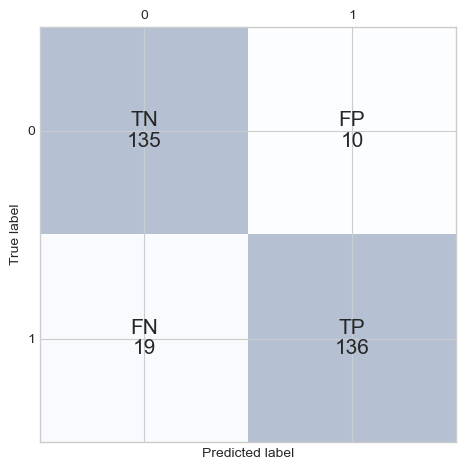

In [147]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
confmat = confusion_matrix(y_test, y_pred)
print(confmat)

# 시각화
confmat_list = ["TN", "FP", "FN", "TP"]
confmat_list = np.array(confmat_list, dtype=object).reshape(2, 2)
ax = plt.subplot()
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i - 0.05, s=confmat_list[i, j], va="center", ha="center", fontsize=15)
        ax.text(x=j, y=i + 0.05, s=confmat[i, j], va="center", ha="center", fontsize=15)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

### 정밀도(Precision)와 재현율(Recall)
- 정밀도 = TP / (TP + FP)
- 재현율 = TP / (TP + FN)
- 정확도 = (TN + TP) / (TN + FP + FN + TP)
- 오류율 = (FN + FP) / (TN + FP + FN + TP) = 1 - 정확도

In [148]:
from sklearn.metrics import precision_score, recall_score

print("정밀도: {}".format(precision_score(y_test, y_pred)))
print("재현율: {}".format(recall_score(y_test, y_pred)))

정밀도: 0.9315068493150684
재현율: 0.8774193548387097


### F1 Score(F-measure)
- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가짐

In [150]:
from sklearn.metrics import f1_score

print("F1 Score: {}".format(f1_score(y_test, y_pred)))

F1 Score: 0.9036544850498338


## ROC 곡선과 AUC
- ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
    - TPR(True Positive Rate): TP / (TP + FN) = 재현율
    - TNR(True Negative Rate): TN / (TN + FP) = Sensitivity
    - FPR(False Positive Rate): FP / (TN + FP) = 1 - Sensitivity
- AUC(Area Under Curve) 값은 ROC 곡선 밑에 면적을 구한 값(1에 가까울수록 좋은 값)

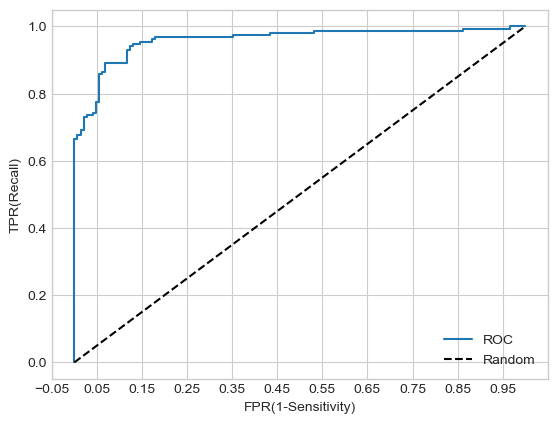

RIC AUC Score: 0.9596440489432702


In [161]:
from sklearn.metrics import roc_curve, roc_auc_score

# 예측 확률 값
y_pred_probability = model.predict_proba(X_test)[:, 1]

# roc_curve로 false_positive_rate, true_positive_rate 추출
false_positive_rate, true_poisitive_rate, thresholds = roc_curve(y_test, y_pred_probability)

# 시각화
plt.plot(false_positive_rate, true_poisitive_rate, label = "ROC")
plt.plot([0, 1], [0, 1], "k--", label = "Random")
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlabel("FPR(1-Sensitivity)")
plt.ylabel("TPR(Recall)")
plt.legend()
plt.show()

# AUC Score
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("RIC AUC Score: {}".format(roc_auc))